In [1]:
import pandas as pd
import glob

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path_files = r"/content/drive/MyDrive/Data_M/"

In [4]:
data_hate = pd.read_pickle(f"{path_files}dataset_fr/data_hate.pkl")

In [5]:
data_hate.head(10)

,HITId,tweet,sentiment,text length,clean_tweet_min,clean_tweet_std,clean_tweet_lem
0,1,rt @user personnage ainsi q tte la clique gauc...,1,128,personnage ainsi q tte la clique gauchiste deg...,personnag tte cliqu gauchist deguis 1 macron!!...,personnage tout cliqu gauchiste deguise 1 macr...
1,2,@user @user @user bah oui t'as raison l'autre ...,1,62,bah oui t'as raison l'autre c'est un mongol.,raison mongol.,raison mongol.
2,3,moi j'ai personne à qui m'adresser pour réclam...,1,120,moi j'ai personne à qui m'adresser pour réclam...,m'adress réclam. voisin attard pu brui adminis...,me adresser réclamer. voisin attarder puant br...
3,4,@user @user c...est vrai que les anchois sont ...,0,102,c ... est vrai que les anchois sont aller sur ...,... vrai anchois aller lun invent million tech...,... vrai anchois aller lune invent million tec...
4,5,eh les renois faut se réveiller la @url,0,39,eh les renois faut se réveiller la,renois faut réveil,renois falloir réveiller
5,6,@user @user en algerie les migrants sont expul...,1,112,en algerie les migrants sont expulsés dans le ...,alger migr expuls désert crois bien qu'vision,algerie migrant expulser désert croi bien que ...
6,7,@user sjw et féministe twitter un sale combo,0,44,sjw et féministe twitter un sale combo,sjw fémin twitt sal combo,sjw féministe twitter sale combo
7,8,@user @user tu sais aussi pourquoi est au dess...,0,101,tu sais aussi pourquoi est au dessus? parce qu...,sais? veut ya d'ani ...,sai? vouloir ya de ani ...
8,9,@user @user mytho t'as juste voulu te faire ke...,1,105,mytho t'as juste voulu te faire ken par les re...,mytho voulu fair ken renois lyc voulu to,mytho vouloir faire ken renois lycer vouloir to
9,10,c’est un giga attardé mdrrr ils va vraiment se...,1,64,c’est un giga attardé mdrrr ils va vraiment se...,gig attard mdrrr va fair shoot,giga-octet attarder mdrrr aller faire shoote


In [6]:
target= data_hate["sentiment"]

In [ ]:
!pip install gensim==4.0
!pip install python-Levenshtein

In [8]:
from gensim.models.word2vec import Word2Vec
from gensim.models import KeyedVectors
import numpy as np

In [9]:
tweets=[line.split() for line in data_hate["clean_tweet_min"]]

In [10]:
# Feed a word2vec with the ingredients
model = Word2Vec(tweets, window=10, min_count=2, workers=8, sg=1)

In [11]:
wv=model.wv
wv.save("model_dataset_fr")

In [15]:
# récupérer les embeddings entrainés sur nos données
w2v_data4k = KeyedVectors.load('model_dataset_fr')

In [13]:
w2v = KeyedVectors.load(f"{path_files}w2v/w2vec_model_d300_global_Min")

In [16]:
w2v.similar_by_word("noir")

[('blanc', 0.6659490466117859),
 ('noir,', 0.6475639343261719),
 ('blanc,', 0.6131015419960022),
 ('roux', 0.6044836640357971),
 ('noir.', 0.603306770324707),
 ('bandeau', 0.5998969674110413),
 ('marron', 0.5980905890464783),
 ('beige', 0.5841408967971802),
 ('blanc.', 0.5792201161384583),
 ('noir?', 0.575861930847168)]

In [17]:
w2v_data4k.similar_by_word("noir")

[('traite', 0.9878836870193481),
 ('merde', 0.9844604730606079),
 ('pute', 0.983635663986206),
 ('ou', 0.9822825193405151),
 ('t’es', 0.9814529418945312),
 ('blanc', 0.9789896607398987),
 ('traiter', 0.9788126945495605),
 ("t'as", 0.9784077405929565),
 ('ton', 0.9778554439544678),
 ('espèce', 0.9776104688644409)]

In [19]:
def encode(msg, model, dim):
    return np.mean([model[word] for word in msg if word in model] or [np.zeros(dim)], axis = 0)

In [23]:
clean_dataset = tweets

In [21]:
dataset_encoded = np.array([encode(msg, w2v, 300) for msg in tweets])

In [22]:
dataset_encoded.shape

(4014, 300)

In [ ]:
data_hate.head()

In [35]:
X= dataset_encoded

MODÈLE ENSEMBLISTE

In [77]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
model = Pipeline([
    (
        "classifier",
        HistGradientBoostingClassifier(
            random_state=42,scoring="balanced_accuracy"
        )
    ),
])

In [39]:
param_grid = {
    'classifier__learning_rate': [0.05, 0.5],    'classifier__max_leaf_nodes': (10, 30),
}
model_grid_search = GridSearchCV(
    model, param_grid=param_grid, n_jobs=2, cv=2
)
model_grid_search.fit(X, target)

GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('classifier',
                                        HistGradientBoostingClassifier(random_state=42,
                                                                       scoring='balanced_accuracy'))]),
             n_jobs=2,
             param_grid={'classifier__learning_rate': [0.05, 0.5],
                         'classifier__max_leaf_nodes': (10, 30)})

In [42]:
cv_results = pd.DataFrame(model_grid_search.cv_results_)
cv_results[[
    "param_classifier__learning_rate",
    "param_classifier__max_leaf_nodes",
    "mean_test_score",
    "std_test_score",
    "rank_test_score"
]]

,param_classifier__learning_rate,param_classifier__max_leaf_nodes,mean_test_score,std_test_score,rank_test_score
0,0.05,10,0.791978,0.005232,1
1,0.05,30,0.786746,0.003986,2
2,0.5,10,0.775536,0.004733,4
3,0.5,30,0.784255,0.003488,3


In [43]:
from sklearn.model_selection import cross_validate

cv_results = cross_validate(model, X, target, cv=5,scoring="balanced_accuracy")
cv_results = pd.DataFrame(cv_results)
cv_results

,fit_time,score_time,test_score
0,5.118547,0.014528,0.500215
1,5.074957,0.013691,0.500215
2,4.984132,0.013480,0.523985
3,5.081445,0.014374,0.528788
4,4.963029,0.013792,0.533279


In [45]:
model_grid_search.best_params_

{'classifier__learning_rate': 0.05, 'classifier__max_leaf_nodes': 10}

In [46]:
model_grid_search.best_estimator_


Pipeline(steps=[('classifier',
                 HistGradientBoostingClassifier(learning_rate=0.05,
                                                max_leaf_nodes=10,
                                                random_state=42,
                                                scoring='balanced_accuracy'))])

In [47]:
cv_results = cross_validate(
    model_grid_search.best_estimator_, X, target, cv=5, n_jobs=2, return_estimator=True,scoring="balanced_accuracy"
)

In [48]:
cv_results = pd.DataFrame(cv_results)
cv_test_scores = cv_results['test_score']
print(
    "Generalization score with hyperparameters tuning:\n"
    f"{cv_test_scores.mean():.3f} +/- {cv_test_scores.std():.3f}"
)

Generalization score with hyperparameters tuning:
0.512 +/- 0.005


Regression logistic+embedding

In [49]:
model_lr = Pipeline([
     ('scaler',MinMaxScaler()) ,                                    
    ('classifier', LogisticRegression(random_state=42,class_weight='balanced', max_iter= 10000))
])
  

In [50]:
cv_results = cross_validate(model_lr, X, target, cv=5)
cv_results = pd.DataFrame(cv_results)
cv_results

,fit_time,score_time,test_score
0,0.661319,0.002408,0.623910
1,0.597026,0.002332,0.622665
2,0.731312,0.002321,0.616438
3,0.596101,0.002338,0.585305
4,0.649592,0.002403,0.678304


In [51]:
cv_test_scores = cv_results['test_score']
print(
    "Generalization score with hyperparameters tuning:\n"
    f"{cv_test_scores.mean():.3f} +/- {cv_test_scores.std():.3f}"
)

Generalization score with hyperparameters tuning:
0.625 +/- 0.034


la normalisation fait passer le score moyen de 0.62

In [68]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'classifier__C': (0.1,1,5)}
model_grid_search_lr = GridSearchCV(model_lr, param_grid=param_grid,
                                 n_jobs=2, cv=10,scoring="balanced_accuracy")


In [69]:
model_grid_search_lr.fit(X, target)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('classifier',
                                        LogisticRegression(class_weight='balanced',
                                                           max_iter=10000,
                                                           random_state=42))]),
             n_jobs=2, param_grid={'classifier__C': (0.1, 1, 5)},
             scoring='balanced_accuracy')

In [70]:
model_grid_search_lr.best_params_

{'classifier__C': 0.1}

In [71]:
cv_results = pd.DataFrame(model_grid_search_lr.cv_results_)
cv_results[[
    "param_classifier__C",
    "mean_test_score",
    "std_test_score",
    "rank_test_score"
]]

,param_classifier__C,mean_test_score,std_test_score,rank_test_score
0,0.1,0.655110,0.048856,1
1,1,0.626249,0.047362,2
2,5,0.608696,0.046236,3


In [72]:
cv_results = cross_validate(
    model_grid_search_lr.best_estimator_, X, target, cv=5, n_jobs=2, return_estimator=True,scoring="balanced_accuracy"
)

In [73]:
cv_results = pd.DataFrame(cv_results)
cv_test_scores = cv_results['test_score']
print(
    "Generalization score with hyperparameters tuning:\n"
    f"{cv_test_scores.mean():.3f} +/- {cv_test_scores.std():.3f}"
)

Generalization score with hyperparameters tuning:
0.653 +/- 0.036


très nette augmentation avec regression logistique +embedding 0.65
le w2vec avec 300 donnent de meilleures résultats 0.65 vs 0.62
la normalisation n'agit pas beaucoup sur les résultats avec gridsearch, la regression logistique sans normalisation donne des résultats similaires voire légèrement meilleures 0.659

In [75]:
y_pred = cross_val_predict(model_grid_search_lr.best_estimator_, X, target, cv=10)
conf_mat = confusion_matrix(target, y_pred)

In [76]:
def draw_mat(conf_mat,string):
  print(string)
  matrice_proportions = np.zeros((2,2))
  for i in range(0,2):
      matrice_proportions[i,:] = conf_mat[i,:]/float(conf_mat[i,:].sum())
  names=['Neutre','Haineux']
  confusion_df = pd.DataFrame(matrice_proportions, index=names,columns=names)
  plt.figure(figsize=(5,5))
  sns.heatmap(confusion_df,annot=True,annot_kws={"size": 12},cmap='YlGnBu',cbar=False, square=True,fmt='.2f')
  plt.ylabel(r'Valeur réelle',fontsize=14)
  plt.xlabel(r'Valeur prédite',fontsize=14)
  plt.tick_params(labelsize=12)

matrice de confusion : LR avec embedding


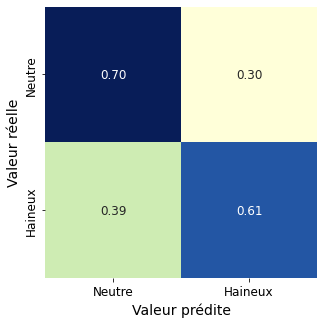

In [78]:
draw_mat(conf_mat, "matrice de confusion : LR avec embedding")

Detection d'anomalies

In [79]:
from sklearn.metrics import classification_report,accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from pylab import rcParams

In [80]:
##Define the outlier detection methods

classifiers = {
    "Isolation Forest":IsolationForest(n_estimators=100, 
                                       contamination=0.2, random_state=5, verbose=0),
    "Local Outlier Factor":LocalOutlierFactor(n_neighbors=20, algorithm='auto', 
                                              leaf_size=30, metric='minkowski',
                                              p=2, metric_params=None, contamination=0.2),
    "Support Vector Machine":OneClassSVM(kernel='rbf', degree=3, gamma=0.1,nu=0.05, 
                                         max_iter=-1)
   
}

In [85]:
def multiple_non_supervised_models(X):
  for i, (clf_name,clf) in enumerate(classifiers.items()):
      #Fit the data and tag outliers
      if clf_name == "Local Outlier Factor":
          y_pred = clf.fit_predict(X)
          scores_prediction = clf.negative_outlier_factor_
      elif clf_name == "Support Vector Machine":
          clf.fit(X)
          y_pred = clf.predict(X)
      else:    
          clf.fit(X)
          scores_prediction = clf.decision_function(X)
          y_pred = clf.predict(X)
      #Reshape the prediction values to 0 for Valid transactions , 1 for Fraud transactions
      y_pred[y_pred == 1] = 1
      y_pred[y_pred == -1] = 0
      n_errors = (y_pred != target).sum()
      # Run Classification Metrics
      print("{}: {}".format(clf_name,n_errors))
      print("Accuracy Score :")
      print(accuracy_score(target,y_pred))
      print("Classification Report :")
      print(classification_report(target,y_pred))

In [86]:
multiple_non_supervised_models(X)

Isolation Forest: 1358
Accuracy Score :
0.661684105630294
Classification Report :
              precision    recall  f1-score   support

           0       0.17      0.16      0.16       821
           1       0.79      0.79      0.79      3193

    accuracy                           0.66      4014
   macro avg       0.48      0.48      0.48      4014
weighted avg       0.66      0.66      0.66      4014

Local Outlier Factor: 1322
Accuracy Score :
0.6706527154957648
Classification Report :
              precision    recall  f1-score   support

           0       0.19      0.18      0.19       821
           1       0.79      0.80      0.79      3193

    accuracy                           0.67      4014
   macro avg       0.49      0.49      0.49      4014
weighted avg       0.67      0.67      0.67      4014

Support Vector Machine: 951
Accuracy Score :
0.7630792227204783
Classification Report :
              precision    recall  f1-score   support

           0       0.18      0.05 

In [87]:
from tensorflow import keras
import random

In [88]:
autoencoder = keras.models.load_model(f"{path_files}dataset_fr/autoencoder/ae_Min_feature_extr")

In [89]:
inp = keras.Input(shape=(300,))
outp = autoencoder.layers[1](inp)
outp = autoencoder.layers[2](outp)
outp = autoencoder.layers[3](outp)
encoder = keras.Model(inp, outp)

In [90]:
dataset_16_features = encoder.predict(dataset_encoded)

In [91]:
X_ae= dataset_16_features

In [92]:
multiple_non_supervised_models(X_ae)

Isolation Forest: 1366
Accuracy Score :
0.6596910812157449
Classification Report :
              precision    recall  f1-score   support

           0       0.16      0.16      0.16       821
           1       0.78      0.79      0.79      3193

    accuracy                           0.66      4014
   macro avg       0.47      0.47      0.47      4014
weighted avg       0.66      0.66      0.66      4014

Local Outlier Factor: 1268
Accuracy Score :
0.6841056302939711
Classification Report :
              precision    recall  f1-score   support

           0       0.22      0.22      0.22       821
           1       0.80      0.80      0.80      3193

    accuracy                           0.68      4014
   macro avg       0.51      0.51      0.51      4014
weighted avg       0.68      0.68      0.68      4014

Support Vector Machine: 968
Accuracy Score :
0.7588440458395616
Classification Report :
              precision    recall  f1-score   support

           0       0.13      0.03